# <div style="text-align:center">Handout: "Harmonic Oscillator and Rigid Rotator"</div>

## <span style="color:blue">1. Theoretical Background</span>

### 1.1. Classical Harmonic Oscillator.
***

#### 1.1.1. Definition

Classical Harmonic Oscillators are bodies which experience a restoring force anytime they experience a displacement away from their equilibrium position.

For example, a mass connected to a wall by a spring will undergo harmonic oscillation if you perturb the body.

![alt text](https://cdn.sciencebuddies.org/Files/8986/7/spring-oscillation-thumbnail.png "logo")
***
#### Solutions of the Classical Harmonic Oscillator
The equation of motion for Classical Harmonic Oscillator:
\begin{align}
m \frac{d^{2}x}{dt^{2}} = -kx
\end{align}

 On solving the equation for Motion above, you will reach the following results:
<div style="text-align:center"> $$x(t) = A cos(\omega t)$$</div>

##### Important results that we get from the solution.
  Amplitude:    $$A = x(0)$$
  Angular Frequency:    $$\omega = \sqrt{\frac{k}{m}}$$
  Kinetic Energy:       $$K(t) = \frac{m}{2} \omega^{2} A^{2} \sin^{2} {\omega t}$$
  Potential Energy:     $$V(t) = \frac{k}{2} A^{2} \cos^{2} {\omega t}$$
  Total Energy:         $$ E = K(t) + V(t) = \frac{k}{2} A^{2}$$
  
***




#### Time evolution of Molecular Oscillation:

In [ ]:
## List of parameter you can play with.

import numpy as np
nu_inv_cm = 4401.0  # Fundamental vibrational frequency (in cm^-1)
m_1 = 1.0 # Mass of atom 1 (amu)
m_2 = 1.0 # Mass of atom 2 (amu)

Amp =  (10**(-11))  # Amplitude of the oscillator in meters.

time  = 0.6*10**(-13) # Length of time you wish to observe
t_step = 10**(-16)  # Time steps.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
from matplotlib import animation, rc
from IPython.display import HTML

## Introduce important constants here
speed_of_light = scipy.constants.speed_of_light # Speed of light
proton_m = scipy.constants.proton_mass # Proton rest mass
planck_const = scipy.constants.Planck

## Unit conversion of reduced mass, frequencies and force constants into SI units,
nu_inv_m = nu_inv_cm * 100
red_mass = (m_1*m_2)/(m_1 + m_2)
red_mass_kg = red_mass * proton_m
k = red_mass_kg * (2.0 * np.pi * speed_of_light * nu_inv_m)**2

## Obtain omega and written plot details.

omega = np.sqrt(k/red_mass_kg)
fig = plt.figure() 
ax = plt.axes(xlim=(0.00, time), ylim=(-1.200 * Amp, 1.200 * Amp)) 
ax.grid()
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 
def animate(i): 
    # t is a parameter 
    t = t_step*i 

# x, y values to be plotted 
    x = t
    y = Amp * np.cos(omega * t)

# appending new points to x, y axes points list 
    xdata.append(x) 
    ydata.append(y) 
    line.set_data(xdata, ydata) 
    return line, 

# setting a title for the plot 
plt.title('Classical Harmonic Oscillator motion of Molecules') 
plt.xlabel('Time in seconds')
plt.ylabel("Displcement from the equilibrium Bond distance")

n_frames = int(time/t_step)
anim = animation.FuncAnimation( fig, animate, init_func = init, frames = n_frames, interval=20, blit = False)
HTML(anim.to_html5_video())

####  Example 1:

#### Question:
Show that the Sum of Kinetic and Potential Energies of a classical Harmonic Oscillator is $\frac{1}{2} kA^{2}$ at any given time.

#### Solution:

Total energy of any classical system is given by the sum of All kinetic and potential Energy contributions.

In classical Harmonic Oscillator, 

$$ E = K(t) + V(t)$$
$$ E = \frac{m}{2} \omega^{2} A^{2} \sin^{2} {\omega t} + \frac{k}{2} A^{2} \cos^{2} {\omega t}$$

We know that $m\omega^2 = k$ from the angular frequency expression above:

$$ E = \frac{k}{2} A^{2} \sin^{2}{\omega t} + \frac{k}{2} A^{2} \cos^{2}{\omega t}$$
$$ E = \frac{k}{2} A^{2} (\sin^{2}{\omega t} + \cos^{2}{\omega t})$$
$$ E = \frac{k}{2} A^{2}$$

As we see, the total energy expression is in fact independent of time.
***

#### We demonstrate using python code that the total energy remains constant at any given time.

In [ ]:
## The code plots total energy, kinetic energy and potential energies at any given time for given 
## force constant, mass and amplitude.
import numpy as np
import matplotlib.pyplot as plt

def energy(k,m,A,t):
    omega = np.sqrt(k/m)
    kin_en = k*(A**2)*0.5*((np.sin(omega*t))**2) #Kinetic Energy term
    pot_en = k*(A**2)*0.5*((np.cos(omega*t))**2) #Potential Energy term
    tot_en =  k*(A**2)*0.5*((np.sin(omega*t))**2) + k*(A**2)*0.5*((np.cos(omega*t))**2)     # total energy term
    return kin_en, pot_en, tot_en
    

In [ ]:
## List of parameters you can play with.

k = 0.01   # Force constant with units Newton/meters.
m = 2.000  # mass with units of Kilograms.
A = 1.500    # Amplitude with units of meters.
num_seconds = 100   # Length of the time you wish to observe.
n_points = 100     # No. of points on each curve.

In [ ]:
## Plotting each energies.

t_points = np.linspace(0,num_seconds,n_points)
kin_en, pot_en, tot_en = energy(k, m, A, t_points)

plt.figure(figsize=(10,4))
plt.plot(t_points, kin_en, label = "Kinetic Energy")
plt.plot(t_points, pot_en, label = "Potential Energy")
plt.plot(t_points, tot_en, label = "Total Energy of the system")
plt.xlabel("Time in seconds", fontsize=15)
plt.ylabel("Energy in Joules", fontsize=15)
plt.legend(loc = 'lower right')
plt.title("Plots of Kinetic, potential and total energy", fontsize=20)
plt.tight_layout()
plt.grid()

#### 1.1.2 Harmonic Oscillator for two Body system:

Classical Harmonic Oscillations can be extended to a two body system as well. Take for example two boxes connected by a spring.


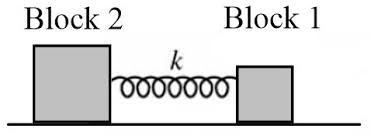

#### Equation of Motion:

For each mass, you'll have an equation of motion which can be written as:


$$ \frac{d^{2}x_1}{dt^2} = \frac{k}{m_1} (x_{2} - x_{1} - l_{0})$$
$$ \frac{d^{2} x_2}{dt^2} = - \frac{k}{m_2}(x_{2} - x_{1} - l_{0})$$

On solving the coupled equation, you'll find that the two body problem reduces into a one body problem that we have solutions to. The reduced equation of motion looks like this:

$$ \mu \frac{d^{2}x}{dt^2} = -kx $$
where $\mu$ is the reduced mass given by:

$$\frac{m_{2} m_{1}}{m_{2} + m_{1}}$$

Therefore, for such systems:

$$\omega = \sqrt{\frac{k}{\mu}}$$

### 1.2. Quantum harmonic oscillator.

Now, let's consider the one-dimensional quantum harmonic oscillator. In this model, a particle is vibrating in a well described by a harmonic potential. Thus, the harmonic oscillator Hamiltonian will have the form:

\begin{align}
\hat{H} = \frac{\hat{p}_x^2}{2\mu} + V(x) = - \frac{\hbar^2}{2\mu} \frac{\mathrm{d}^2}{\mathrm{d}x^2} + \frac{k}{2}x^2
\end{align}

The Schrödinger equation for the harmonic oscillator takes the form:

\begin{align}
\hat{H} \Psi_n(x) = E_n \Psi_n(x)
\end{align}

\begin{align}
- \frac{\hbar^2}{2\mu} \frac{\mathrm{d}^2}{\mathrm{d}x^2}\Psi_n(x) + \frac{k}{2}x^2\Psi_n(x) = E_n \Psi_n(x)
\end{align}

This equation can be solved analytically, but the solution is more complicated than solving the Schrödinger equation for the particle in a box.

### 1.3. Energy levels of quantum harmonic oscillator

The energy levels of quantum harmonic oscillator are given by the following equation:

\begin{align}
E_n = \left( n + \frac{1}{2} \right) \hbar \omega = \left( n + \frac{1}{2} \right) h \nu
\end{align}

where $\omega$ is the angular frequency and $\nu = \frac{\omega}{2\pi}$ is the linear frequency. The angular frequency is related to the Hooke's constand $k$ and the reduced mass $\mu$ as follows:

\begin{align}
\omega = \sqrt{\frac{k}{\mu}}
\end{align}

The energy spectrum of harmonic oscillator has several important properties:

* **Energies are quantized**. The quantum number $n$ appearing in the energy expression can only take integer vales $n = 0, 1, 2, 3, \ldots$

* **Energy levels are equally-spaced**. The spacing between the energy levels is equal to $\hbar \omega$. 

* **In the ground level ($n=0$), the energy is not zero**. This energy is known as *zero-point energy* (ZPE). For the quantum harmonic oscillator, ZPE is given by:

\begin{align}
E_0 = \frac{\hbar\omega}{2}
\end{align}




#### Example X. Given a fundamental vibrational frequency (in cm$^{-1}$) and atomic masses of a diatomic molecule, plot its harmonic potential and several lowest vibrational energy levels.

1) First, let's set up parameters of our problem by specifying the fundamental vibrational frequency $\tilde{\nu}$ (in cm$^{-1}$), atomic masses (in amu), and the number of energy levels we will plot:

In [ ]:
# Parameters for H2
nu_inv_cm = 4401.0 # Fundamental vibrational frequency (in cm^-1)
m_1 = 1.0 # Mass of atom 1 (amu)
m_2 = 1.0 # Mass of atom 2 (amu)
#nu_inv_cm = 323.0 # Fundamental vibrational frequency (in cm^-1)
#m_1 = 79 # Mass of atom 1 (amu)
#m_2 = 79 # Mass of atom 2 (amu)
n_levels = 4
n_points = 100 # Number of points used for the plot

2) Now, calculate reduced mass ($\mu$, kg) and force constant of the molecule ($k$, N m$^{-1}$):

In [ ]:
# Import Python modules
import numpy as np
import scipy.constants
import matplotlib.pyplot as plt

# Physical constants
speed_of_light = scipy.constants.speed_of_light # Speed of light
proton_m = scipy.constants.proton_mass # Proton rest mass
planck_const = scipy.constants.Planck

# Convert vibrational frequency in SI units (m^1)
nu_inv_m = nu_inv_cm * 100

red_mass = m_1 * m_2 / (m_1 + m_2) # Reduced mass in amu
red_mass *= proton_m # Reduced mass in kg

force_const = red_mass * (2.0 * np.pi * speed_of_light * nu_inv_m)**2 # Force constant N m^-1

print ("Reduced mass: ", red_mass, "(kg)")
print ("Force constant:", force_const, "(N m^-1)")

3) Calculate the values of energies (in J) for each energy level:

In [ ]:
nu = nu_inv_m * speed_of_light

energy_levels = np.zeros(n_levels)

for v in range(n_levels):
    energy_levels[v] = planck_const * nu * (v + 0.5)

4) Plot the harmonic potential and energy levels

In [ ]:
# Define function to calculate harmonic potential for force constant k and position x
def harmonic_potential(k,x):
    return 0.5 * k * x**2

# Define x points
x_max = np.sqrt(2.0 * energy_levels / force_const)
x_max = x_max[-1] + (x_max[-1] - x_max[-2]) / 2
x_points = np.linspace(-x_max, x_max ,n_points)

# Evaluate potential at each x
V = harmonic_potential(force_const, x_points)

# Set up graph and plot
plt.figure(figsize=(5,5))
for e in energy_levels:
    e_x_max = np.sqrt(2.0 * e / force_const)
    plt.hlines(e, -e_x_max, e_x_max, colors="green")

plt.plot(x_points, V)
plt.xlabel("x", fontsize=20)
plt.ylabel("V(x)", fontsize=20)
plt.title("Harmonic potential V(x)", fontsize=16)
plt.tight_layout()
plt.grid()



### 1.4. Quantum harmonic oscillator wavefunctions

The quantum harmonic oscillator wavefunctions have a general form:

\begin{align}
\Psi_n(x) = N_n H_n (\sqrt{\alpha}x)e^{-\alpha x^2 / 2}
\end{align}

where $N_n$ is a normalization constant
\begin{align}
N_n = \frac{1}{\sqrt{2^n \,n!}}\left( \frac{\alpha}{\pi} \right)^{1/4}
\end{align}

$\alpha$ is a constant that depends on the Hooke's constant $k$ and reduced mass $\mu$

\begin{align}
\alpha = \sqrt{\frac{k\mu}{\hbar^2}}
\end{align}

and functions $H_n (\sqrt{\alpha}x)$ are known as Hermite polynomials. The Hermite polynomials can be generated for different quantum numbers $n$ using a recursion relation

\begin{align}
H_{n+1}(y) = 2y H_n(y) - 2nH_{n-1}(y)
\end{align}

by starting with the zeroth-order and first-order Hermite polynomials: $H_0(y) = 1$ and $H_1(y) = 2y$.

The harmonic oscillator wavefunctions have several notable properties:

* **Wavefunction $\Psi_n(x)$ of the $n$-th energy level has $n$ nodes**. Nodes are points when $\Psi_n(x)=0$ and changes sign. The ground-state wavefunction $\Psi_0(x)$ is no nodes. Each successive wavefunction has one more node, which increases its "waviness". These nodes are necessary to ensure that all wavefunctions are orthogonal to each other.

* **Each wavefunction $\Psi_n(x)$ is either an even or odd function**. Harmonic oscillator wavefunctions $\Psi_n(x)$ alternate between being odd or even with increasing (or decreasing) quantum number $n$. This property is very important because it significantly simplifies calculation of averages of quantum-mechanical operators (e.g., average position or momentum).

* **For each state, wavefunction and probability density are non-zero beyond the classical turning points**. This property is a manifistation of quantum-mechanical tunneling.





## <span style="color:blue">2. Exercises</span>

### 2.1. Exercise 1. 